In [5]:
import numpy as np
import pandas as pd

import IPython.display as ipd
from IPython.display import Image, Audio

path_img = '../img/8.content-based_audio_retrieval/'
path_data = '../data_FMP/'

# Content-Based Audio Retrieval: Introduction

- **정보 검색**(information retrieval, IR)의 정보를 구성하고 액세스 가능하고 유용하게 만드는 작업에 관한 분야이다. 정보 검색 프로세스는 사용자가 **쿼리**(**query**)를 통해 자신의 정보 요구 사항을 지정하면 시작된다. 그런 다음 검색 시스템은 주어진 자료에서 쿼리와 관련된 모든 **문서** 또는 **아이템**을 전달한다.

- 음악 추천 및 재생 목록 생성의 대부분의 서비스는 실제 오디오 컨텐츠의 메타 데이터 및 텍스트 주석에 의존한다. 예를 들어, 음악 녹음은 아티스트 또는 작곡가의 이름, 작품의 제목 또는 노래 가사 등의 수동적으로 편집된 데이터로 설명 될 수 있다. 최근의 검색 시스템은 일반적이고 표현적인 주석으로 편집 메타데이터를 보완하며, 이는 **태그**(**tag**)라고도 한다. 이러한 태그는 녹음의 음악 스타일 또는 장르를 설명 할 수 있으며 분위기, 키(key) 또는 템포에 대한 정보도 포함 할 수 있다. 많은 음악 추천 시스템은 여러 사용자가 생성하고 음악 블로그 등에서 자동으로 추출된 태그에 의존하며, 이는 사용자 행동 및 음악 소비에 대한 통계 정보를 담는다. 비록 이러한 태그는 꽤 노이지(noisy)하지만, 여전히 일반적인 추세를 표현하고 음악 내용을 통계적 및 인간 중심 방식으로 설명한다.

- **텍스트 기반** 검색 시스템은 매우 강력할 수 있지만, 적절하고 풍부한 메타데이터의 음악 자료를 필요로 한다. 이는 특히 덜 인기 있는 음악이나 구조화되지 않은 공간에 흩어져 있는 음악 자료의 경우 종종 유효하지 않은 가정이다. 또한 모든 검색 시나리오를 순전히 텍스트 기반 접근 방식으로 처리할 수 있는 것은 아니다. 사용자의 쿼리가 CD 녹음의 짧은 발췌문이나 마이크에 대고 부르는 멜로디로 구성되어 있다면 검색 시스템은 어떻게 설계되어야 할까? 악보의 몇 소절만 사용할 수 있는 경우 어떻게 할 수 있을까? 주석이 없는 특정 리듬 패턴이나 화음 진행이 있는 음악을 사용자가 찾는다면 어떻게 찾을 수 있을까? 
    - 이러한 시나리오를 처리하려면 수동으로 생성된 메타데이터에 의존하지 않고, 원래의 음악 데이터만 사용하는 **내용 기반 검색**(**content-based retrieval**) 시스템이 필요한다. **내용**(**content**)이라는 용어는 대략적으로 쿼리, 비교 및 검색할 음악 자료에서 **직접적**으로 얻을 수 있는 모든 종류의 정보를 나타낸다.

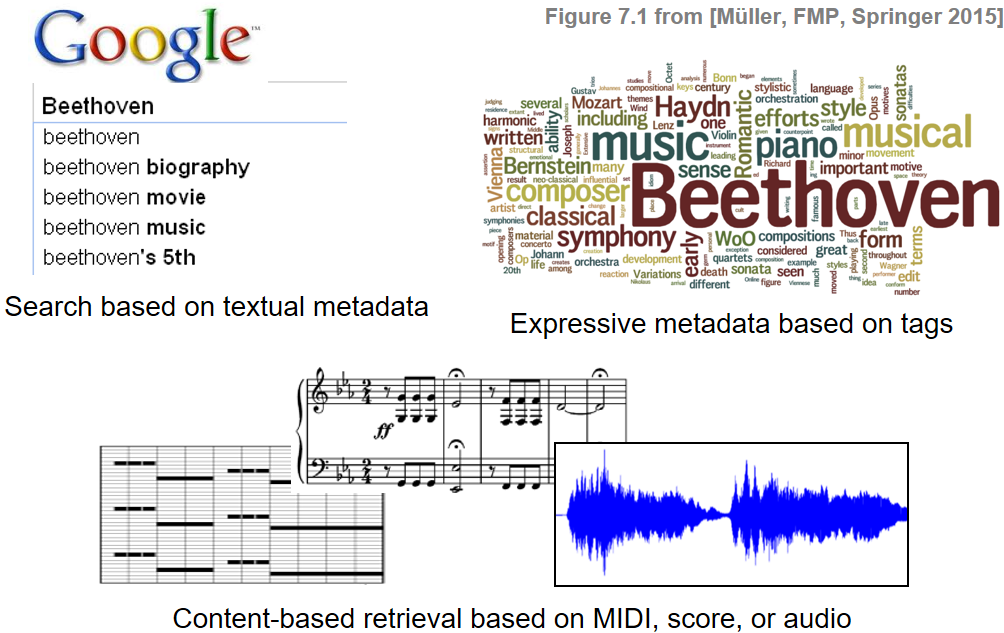

In [6]:
Image(path_img+"FMP_C7_F01_text.png", width=600)

## Query-By-Example

- 많은 콘텐츠-기반 검색 전략은 **쿼리별 예제**(**query-by-example**) 패러다임을 따른다. 음악 표현 또는 그 일부(쿼리 또는 예제로 사용됨)가 주어지면, 음악 컬렉션에서 쿼리와 유사한 부분 또는 측면을 포함하는 문서를 자동으로 검색하는 것이다. 이 패러다임을 기반으로 세 가지 콘텐츠 기반 검색 작업의 예를 보자.

     * 쿼리로 작은 오디오가 주어지면 **오디오 식별**(**audio identification**)(**오디오 핑거프린팅**(**fingerprinting**)이라고도 함) 작업은 쿼리의 원천인 특정 오디오 녹음을 식별하는 것으로 구성된다. 예를 들어, 베토벤 교향곡 5번의 번스타인 녹음(1962)의 작은 발췌가 주어지면, 목표는 이 녹음을 정확히 식별하는 것이다.

     * 핑거프린팅 시스템은 Karajan(1982)의 녹음과 같은 동일한 작품의 다른 녹음을 식별할 수 없다. 이것이 바로 **오디오 매칭**(**audio matching**)이라는 검색 작업의 목표이다. 쿼리 조각이 주어지면 오디오 매칭의 목표는 해당되는 모든 오디오 발췌 부분을 음악적으로 검색하는 것이다. 이 시나리오에서는 일반적으로 다른 연주 및 음악 편곡에서 발생하는 변형을 명시적으로 허용한다.

     * 유사성의 개념을 더욱 부드럽게 하는 **버전 식별**(**version identification**)(때때로 **커버 곡 검색**(**version identification**)이라고도 함) 작업은 악기 편성 및 템포뿐만 아니라 일반적으로 리믹스 및 커버 곡에서 발생하는 음악 구조, 키 또는 멜로디와 관련하여 더 극단적인 변형을 고려한다.

     * 마지막으로 **카테고리 기반**(**category-based**) 검색 시나리오(**장르 분류**(genre classification) 포함)에서 유사성 관계는 다소 모호하며 문화적 또는 음악학적 범주를 표현한다.

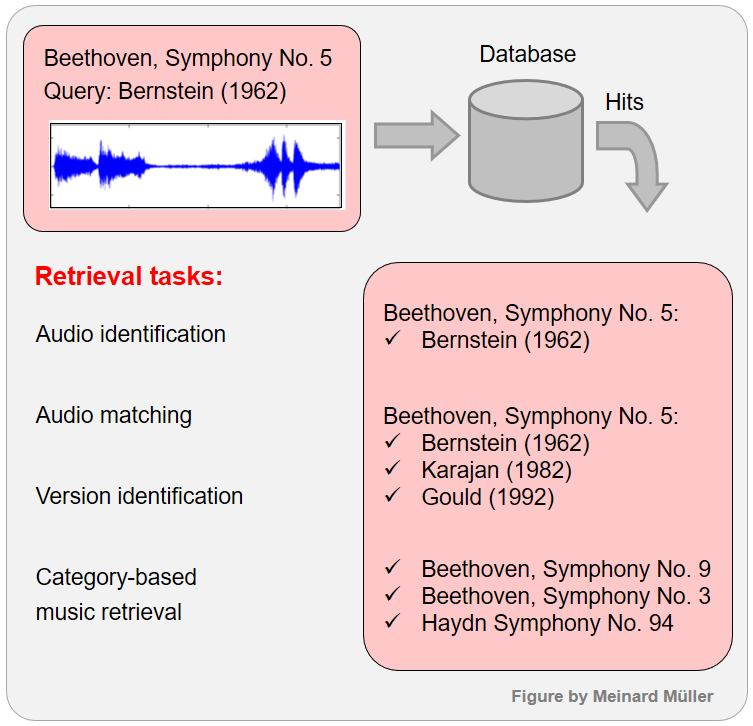

In [7]:
Image(path_img + "FMP_C7_F01_BeetFifth.png", width=500)

<table style="border:none;text-align:left;">
   <tr>
      <th style="border:none;text-align:left;">Metadata</th>
      <th style="border:none;text-align:left;">Audio</th>
   </tr>
    
   <tr>
      <td style="border:none;text-align:left;">Beethoven: <br>Symphony No. 5<br> (Bernstein)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 500px;" src="../data_FMP/CBAR_MP3/FMP_C7_F01_Beethoven_Op067-01-001-021_Bernstein.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Beethoven: <br>Symphony No. 5<br> (Karajan)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 500px;" src="../data_FMP/CBAR_MP3/FMP_C7_F01_Beethoven_Op067-01-001-021_Karajan.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Beethoven: <br>Symphony No. 5<br> (Gould)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 500px;" src="../data_FMP/CBAR_MP3/FMP_C7_F01_Beethoven_Op067-01-001-021_Gould.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Beethoven: <br>Symphony No. 9<br> (Bernstein)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 500px;" src="../data_FMP/CBAR_MP3/FMP_C7_F01_Beethoven_Op125-02_Bernstein.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>

   <tr>
      <td style="border:none;text-align:left;">Beethoven: <br>Symphony No. 3<br> (Blomstedt)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 500px;" src="../data_FMP/CBAR_MP3/FMP_C7_F01_Beethoven_Op055-01_Blomstedt.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>

   <tr>
      <td style="border:none;text-align:left;">Haydn: <br>Symphony No. 94</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 500px;" src="../data_FMP/CBAR_MP3/FMP_C7_F01_Haydn_H1-94-01.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
</table>

## 특이성과 세분성 (specificity and granularity)

- 내용 기반 검색 전략은 **특이성**(**specificity**) 및 **세분성**(**granularity**)에 따라 느슨하게 분류할 수 있다.
    - 검색 시스템의 **특이성**은 쿼리와 검색할 데이터베이스 문서 간의 유사성 정도를 의미한다. 특이성이 높은 검색 시스템은 쿼리의 정확하거나 가까운 복사본을 반환하는 반면, 낮은 특이성의 검색 시스템은 수치적 관점에서 원래 쿼리와 상당히 다를 수 있는 항목을 반환한다.
    - **세분성**은 검색 시나리오에서 고려되는 시간적 수준을 나타낸다. **조각 수준**(**fragment-level**) 검색 시나리오에서 쿼리는 오디오 녹음의 짧은 조각으로 구성되며 목표는 데이터베이스 문서에 포함된 모든 관련 조각(fragement)을 검색하는 것이다. 예를 들어, 이러한 조각은 오디오 내용의 몇 초를 커버하거나 모티프, 테마 또는 음악 파트에 해당할 수 있다. 반면 **문서 수준**(**document-level**) 검색에서는 쿼리가 전체 문서의 특성을 반영하여 데이터베이스의 전체 문서와 비교한다. 이 경우 전체 유사성 점수가 여전히 로컬 조각 수준 비교를 기반으로 할 수 있지만 유사성 개념이 더 거친 경향이 있다.


- 다양한 내용 기반 검색 시나리오는 특이성과 세분성에 따라 **특이성-세분성 평면**에 느슨하게 배열될 수 있다. 다음 그림에서 세 가지 시나리오(오디오 식별, 오디오 매칭 및 버전 식별)는 여러 관련 검색 시나리오를 포함하는 구름으로 표시된다. **카테고리 기반** 검색 시나리오를 나타내는 네 번째 구름이 추가된다. 이 분류법은 너무 단순할 수 있지만, 미묘하나 중요한 차이점을 설명하면서 다양한 검색 패러다임에 대한 직관적인 개요를 제공한다.

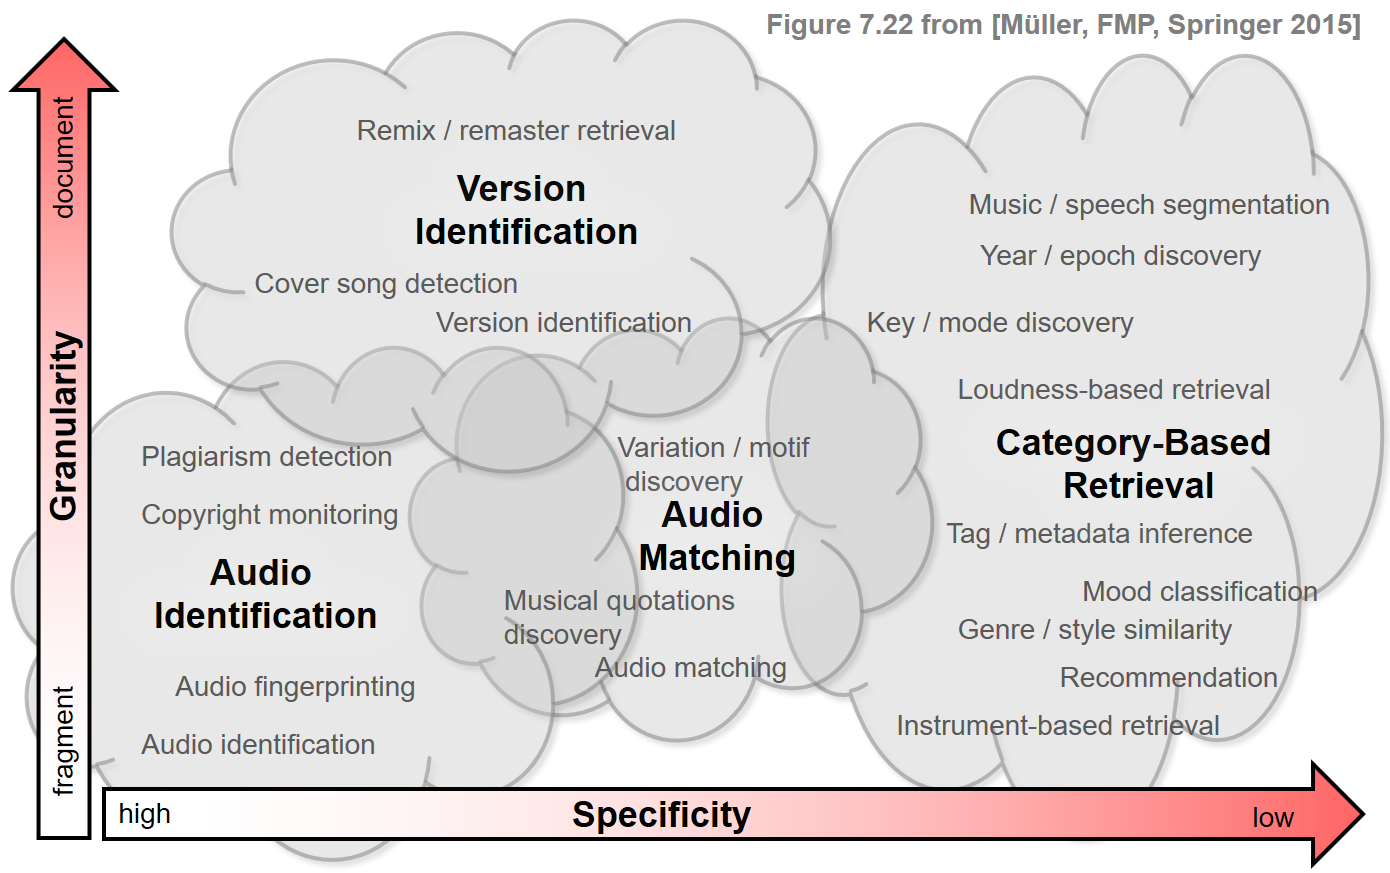

In [8]:
Image(path_img+"FMP_C7_F22_small.png", width=600)

## 음악의 버전 Versions in Music

- 서양 문화에서 **piece of music**이라고 하면 일반적으로 악보로 주어지거나 녹음된 트랙의 형태로 주어진 특정 구성을 생각한다. 종종 음악 작품의 기원을 거슬러 올라가 작곡가나 음악 그룹의 이름과 연관시킬 수 있다. 예를 들어 Ludwig van Beethoven이 작곡한 악보는 교향곡 5번의 원본으로 간주된다. 또는 노래 "Yellow Submarine"의 원래 버전은 의심할 여지 없이 영국 록 밴드 "The Beatles"의 녹음이다. 
- 그러나 일반적으로 음악의 경우 이러한 견해는 다소 단순하며 "원본 버전"이라는 용어는 말할 것도 없고 "piece of music"이라는 용어를 사용하는 것은 문제가 될 수 있다. 다음에서는 단순한 관점을 채택하고 다소 느슨한 방식으로 "piece of music" 및 "버전(version)"이라는 용어를 사용한다. 이러한 용어에 대한 형식적인 정의를 내리기보다는 서양 음악의 맥락에서 몇 가지 전형적인 예를 살펴보도록 한다.

- **편곡**(**arrangement**)이란 원래 악보에 표기된 악기와 다른 악기로 연주할 수 있도록 악보를 다시 작업하는 것을 말한다.
- **피아노 편곡**(**piano transcription**)은 교향곡과 실내악을 편곡하여 한 대 또는 두 대의 피아노로 연주할 수 있도록 한 것이다.
- **쿼들리벳**(**quodlibet**)(15세기에 작곡)은 다양한 멜로디, 일반적으로 대중적인 민속 음악이 유머러스한 방식으로 결합된 음악 작품을 말한다.
- **포푸리**(**potpourri**)(19세기에 작곡)는 인기 있는 오페라, 오페레타 또는 노래의 개별 섹션이 강력한 연관성이나 관계 없이 단순히 병치된 작품이다.
- **메들리**(**medley**)는 기존 곡의 일부, 일반적으로 노래에서 가장 기억에 남는 부분을 차례로 연주하며, 중첩하여 구성한 작품이다.
- **DJ 믹스**는 DJ가 기존 오디오 자료를 조작, 블렌딩 및 믹싱(예: 턴테이블 스크래칭을 적용하여 원본 녹음에 혼합된 타악기 사운드를 생성)함으로써 공연 뮤지션 역할을 하는 버전이다.
- **샘플링**(**sampling**)은 하나의 녹음에서 일부 또는 샘플을 가져와 다른 곡에서 "새로운" 악기로 재사용하는 기술을 말한다.
- **리믹스**(**remix**)는 원래 버전과 다르게 들리도록 편집되었거나 완전히 다시 만들어진 녹음이다. 이러한 수정은 강약, 피치, 템포 및 재생 시간의 변경에서 음성 및 악기 트랙의 완전한 재배열에 이르기까지 다양할 수 있다.
- **리마스터링**(**remastering**)의 목표는 기존 녹음의 음질을 향상시키는 것이다.
- **매시업**(**mash-up**)은 한 곡의 보컬 트랙을 다른 곡의 악기 트랙 위에 매끄럽게 오버레이하여 생성되는 새로운 구성이다.
- **사운드 콜라주**(**sound collage**)는 기존 녹음 또는 음악의 일부를 결합하여 얻은 구성으로, 시각 예술의 콜라주와 유사하다.
- **인용문**(**quotation**)은 음악에서 멜로디나 주제와 같은 기존 음악 자료를 새로운 구성에 사용하는 것을 의미한다.
- 음악 자료가 하모니, 멜로디, 리듬, 음색, 오케스트레이션 또는 이들의 조합을 포함할 수 있는 변화와 함께 변경된 형태로 반복되는 경우 **변주**(**variation**)라고 합니다.
- **패러디**(**parody**)는 원작을 조롱하고 하찮게 모방하는 것입니다.
- **커버(cover) 버전** 또는 **커버 곡**은 원곡자가 아닌 다른 사람이 이전에 발표한 곡을 새롭게 퍼포먼스 하는 것을 의미한다.

- 이들은 음악 작품의 "버전"으로 이해할 수 있는 것의 일부 예일 뿐이다. 버전은 음색, 악기 편성, 템포, 키, 하모니, 멜로디, 가사 및 음악 구조의 상당한 변화를 포함하여 여러 면에서 원본 녹음과 다를 수 있다. 예를 들어, 베토벤 교향곡 5번의 버전을 찾을 때 많은 음표가 수정되고 원래 구조의 대부분이 손실된 록 밴드의 라이브 공연을 검색하는 데 관심이 있을 수 있다. 톤과 템포의 급격한 변화에도 불구하고 수정된 버전에서도 빛을 발하는 원래 구성의 특징적인 선율, 화성 또는 리듬 요소를 통해 원래 구성을 여전히 인식할 수 있다.

- 커버 송의 예를 보자.
<br clear="all" />

<table style="border:none;text-align:left;">
   <tr>
      <th style="width:15%; border:none;text-align:left;">Song Name</th>
      <th style="width:20%; border:none;text-align:left;">Original Version</th>
      <th style="width:10%; border:none;text-align:left;"><strong><font color="red">Modification</font></strong></th>        
      <th style="width:20%; border:none;text-align:left;">Cover Version</th>
      <th style="width:15%; border:none;text-align:left;">Song Name</th>       
   </tr>
    
   <tr>
      <td style="border:none;text-align:left;">Bob Dylan: Knockin' On Heaven's Door</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data_FMP/CBAR_MP3/FMP_C7_KnockingOnHeavensDoor_BobDylan.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;"><strong><font color="red">Key</font></strong></td>    
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data_FMP/CBAR_MP3/FMP_C7_KnockingOnHeavensDoor_AvrilLavigne.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">Avril Lavigne: Knockin' On Heaven's</td>    
   </tr>
    
   <tr>
      <td style="border:none;text-align:left;">Metallica: Enter Sandman</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data_FMP/CBAR_MP3/FMP_C7_EnterSandman_Metallica.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;"><strong><font color="red">Timbre</font></strong>   
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data_FMP/CBAR_MP3/FMP_C7_EnterSandman_Apocalyptica.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
     <td style="border:none;text-align:left;">Apocalyptica: Enter Sandman</td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Nirvana: Poly (Incesticide Album)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;"  src="../data_FMP/CBAR_MP3/FMP_C7_Poly_Incesticide.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
    <td style="border:none;text-align:left;"><strong><font color="red">Tempo</font></strong>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;"  src="../data_FMP/CBAR_MP3/FMP_C7_Poly_Unplugged.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
    <td style="border:none;text-align:left;">Nirvana: Poly (Unplugged)</td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Black Sabbath: Paranoid</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;"  src="../data_FMP/CBAR_MP3/FMP_C7_Paranoid_BlackSabbath.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
    <td style="border:none;text-align:left;"><strong><font color="red">Lyrics</font></strong>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;"  src="../data_FMP/CBAR_MP3/FMP_C7_Paranoid_CindyBert.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
    <td style="border:none;text-align:left;">Cindy & Bert: Der Hund von Baskerville</td>
   </tr>

   <tr>
      <td style="border:none;text-align:left;">AC/DC: High Voltage</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;"  src="../data_FMP/CBAR_MP3/FMP_C7_HighVoltage_ACDC.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
    <td style="border:none;text-align:left;"><strong><font color="red">Recording conditions</font></strong>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;"  src="../data_FMP/CBAR_MP3/FMP_C7_HighVoltage_ACDC-live.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
    <td style="border:none;text-align:left;">AC/DC: High Voltage (live)</td>
   </tr>   
   

</table>

- 이 개요는 원래 음악 작품과 연관될 수 있는 버전을 참조하기 위해 존재하는 다양한 개념을 살짝만 보여준다. 요즘에는 오디오 자료를 배포, 녹음 및 처리하는 개인용 디지털 기술을 사용할 수 있으므로 준전문 음악 밴드와 아마추어가 종종 기존 노래와 오디오 자료를 기반으로 자신의 음악을 쉽게 제작할 수 있다. George Gershwin의 "Summertime"이나 The Beatles의 "Yesterday"와 같은 많은 노래의 경우 YouTube와 같은 비디오 공유 웹사이트에서 수백 가지 버전을 찾을 수 있으며 그 중 일부는 수백만 번의 클릭이 발생하기도 한다. 물론 새로운 버전을 만들기 위해 기존 작품을 모방, 조작, 수정하는 것은 음악에만 국한되지 않는다. 인용, 패러디, 번역, 표절에 기초한 원칙은 문학, 회화, 조각 또는 사진에서 찾을 수 있다.